In [10]:
import pandas as pd
from matplotlib import font_manager, rc
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import seaborn as sns

Compositional Data Clustering이 잘 진행되었는지 시각적으로 확인하기 위해 고차원 시각화가 가능한 t-SNE 사용

In [12]:
data = pd.read_csv("유형 트렌드 compositionaldata_0502.csv", encoding="cp949")
X = data.drop(["광역","기초"], axis=1)

C:\Users\145kj\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\145kj\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\145kj\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


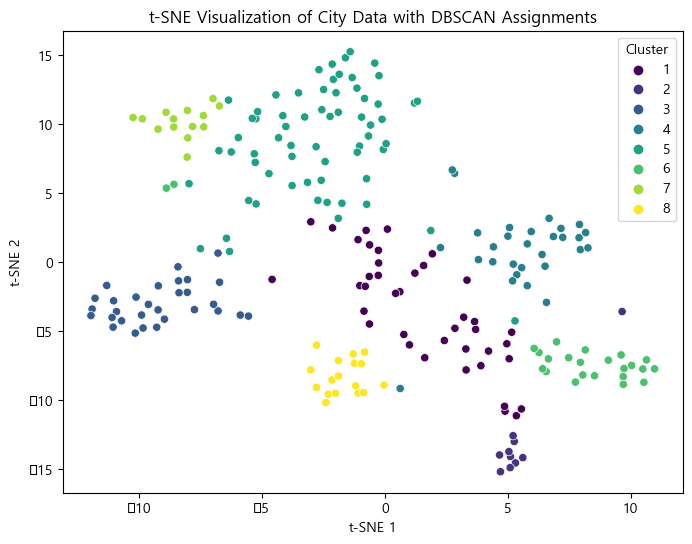

In [11]:
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
data_tsne = tsne.fit_transform(data.iloc[:,4:15])

df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'])
df_tsne['City'] = data["기초"]
df_tsne['Cluster'] = data["cluster"]


plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_tsne, x='x', y='y', hue='Cluster', palette='viridis', legend='full')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE Visualization of City Data with Cluster Assignments')
plt.show()